In [43]:
import numpy as np
import pandas ps pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [44]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [46]:
df=pd.read_excel("fruitdata.xlsx", engine='openpyxl')


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fruit_label  59 non-null     int64  
 1   fruit_name   59 non-null     object 
 2   mass         59 non-null     int64  
 3   width        59 non-null     float64
 4   height       59 non-null     float64
 5   color_score  59 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.9+ KB


In [48]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [49]:
print(df['fruit_label'].value_counts())
print(df['fruit_name'].value_counts())

3    19
1    19
4    16
2     5
Name: fruit_label, dtype: int64
orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64


In [50]:
cols=['fruit_label','mass','width','height','color_score']
df[cols].corr()[['fruit_label']]

,fruit_label
fruit_label,1.000000
mass,0.032738
width,-0.298090
height,0.508766
color_score,-0.310521


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
X=df.iloc[:,[4,5]].values
y=df.iloc[:,0]
print(X.shape,y.shape)

(59, 2) (59,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

In [56]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = (clf, acc)
    print(f"{name} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.58
KNN Accuracy: 0.83
Decision Tree Accuracy: 0.83
Random Forest Accuracy: 0.75
SVM Accuracy: 0.75
Naive Bayes Accuracy: 0.75


In [57]:
sorted_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)

In [58]:
plot_features = ['width', 'height']
X_plot = df[plot_features]
y_plot = df['fruit_label']
X_plot_scaled = StandardScaler().fit_transform(X_plot)

In [59]:
# Meshgrid
x_min, x_max = X_plot_scaled[:, 0].min() - 1, X_plot_scaled[:, 0].max() + 1
y_min, y_max = X_plot_scaled[:, 1].min() - 1, X_plot_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

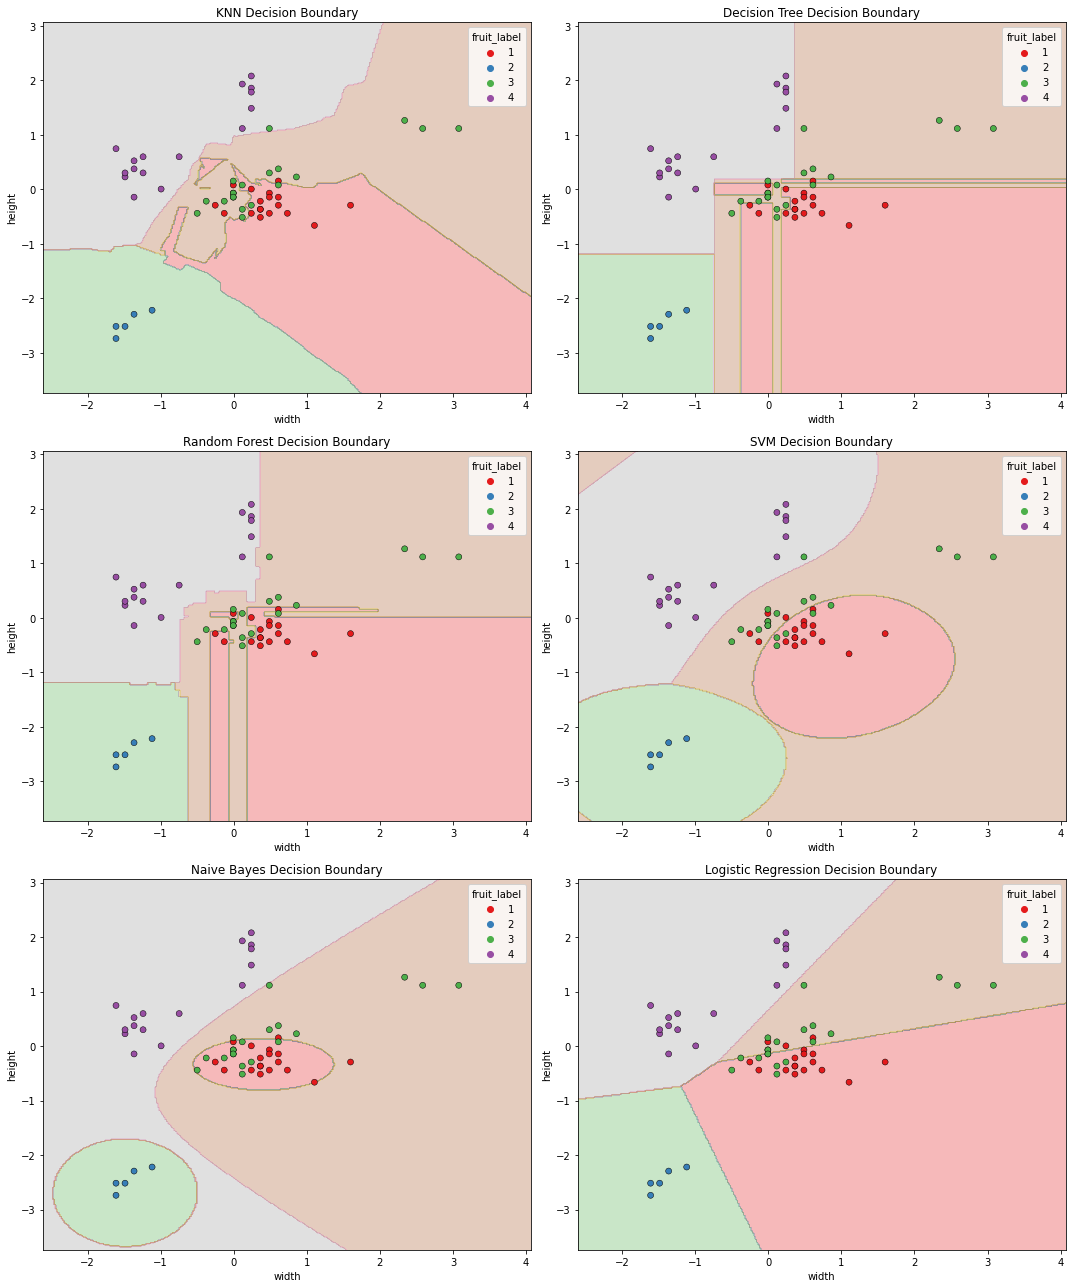

In [60]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, (name, (clf, _)) in enumerate(sorted_results):
    clf.fit(X_plot_scaled, y_plot)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    sns.scatterplot(x=X_plot_scaled[:, 0], y=X_plot_scaled[:, 1], hue=y_plot,
                    ax=axes[idx], palette='Set1', edgecolor='k')
    axes[idx].set_title(f"{name} Decision Boundary")
    axes[idx].set_xlabel(plot_features[0])
    axes[idx].set_ylabel(plot_features[1])

plt.tight_layout()
plt.show()